# Importing & Setup

In [ ]:
%cd E:\Desktop\IH\Project CLemens  #Switch working directory

!pip install kagglehub
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import text
import os
from sklearn.model_selection import train_test_split

# Download latest version
path = kagglehub.dataset_download("ulrikthygepedersen/speed-dating")

print("Path to dataset files:", path)


[WinError 2] The system cannot find the file specified: 'E:\\Desktop\\IH\\Project CLemens #Switch working directory'
E:\Desktop\IH\Project CLemens


C:\Users\Clemens Fritzen\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


Path to dataset files: C:\Users\Clemens Fritzen\.cache\kagglehub\datasets\ulrikthygepedersen\speed-dating\versions\1


In [ ]:
import os
print(os.getcwd())

E:\Desktop\IH\Project CLemens


In [ ]:
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break # Exit loop once CSV file is found


In [ ]:
df=pd.read_csv(csv_file_path)
df=df.drop("has_null", axis=1)
df.shape

(8378, 122)

# Cleaning

In [ ]:




import pandas as pd

def create_mapping_dict(series):
    """Creates a dictionary for mapping values with b'...' prefixes to cleaned values.

    Args:
        series: A pandas Series containing the values to be mapped.

    Returns:
        A dictionary where keys are the original values (as strings)
        and values are the cleaned strings without b'...' prefixes.
    """

    mapping_dict = {}
    for value in series.unique():
        # Convert the value to string to ensure consistent key type
        key = str(value)
        # Clean the value if it's a byte string, otherwise keep it as is
        cleaned_value = str(value)[2:-1]
        mapping_dict[key] = cleaned_value
    return mapping_dict

# Example usage:
# Assuming 'column_name' is the column you want to create a mapping for
#mapping_dict_for_column = create_mapping_dict(df["d_like"])

# You can then use this dictionary with .map to clean the column:
# df['column_name'] = df['column_name'].map(mapping_dict_for_column)
#clean all columns once
string_columns = df.select_dtypes(include=['object']).columns.tolist()
#print(string_columns)

for col in string_columns:
  df[col]=df[col].map(create_mapping_dict(df[col]))


def convert_to_float(df):
    """Converts columns to float data type where possible.

    Args:
        df: The input Pandas DataFrame.

    Returns:
        The DataFrame with columns converted to float.
    """

    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='ignore').astype(float)
        except (ValueError, TypeError):
            pass  # Skip columns that cannot be converted
    return df

df = convert_to_float(df)

empties=df.isna().sum().sort_values(ascending=False).head(17).keys()
#drop the top 17 columns by empty values
df = df.drop(columns=empties)
df = df.dropna()
df=df.drop(columns="field")
df



C:\Users\Clemens Fritzen\AppData\Local\Temp\ipykernel_16744\2978787716.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore').astype(float)
C:\Users\Clemens Fritzen\AppData\Local\Temp\ipykernel_16744\2978787716.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore').astype(float)
C:\Users\Clemens Fritzen\AppData\Local\Temp\ipykernel_16744\2978787716.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore').astype(float)
C:\Users\Clemens Fritzen\AppData\Local\Temp\ipykernel_16744\2978787716.py:49: FutureW

,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,d_interests_correlate,expected_happy_with_sd_people,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked,decision,decision_o,match
0,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0.0,2.0,...,[0-0.33],3.0,[0-4],[0-3],[3-5],[6-8],[5-6],1.0,0.0,0.0
1,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0.0,2.0,...,[0.33-1],3.0,[0-4],[0-3],[3-5],[6-8],[5-6],1.0,0.0,0.0
2,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1.0,2.0,...,[0-0.33],3.0,[0-4],[0-3],[3-5],[6-8],[0-4],1.0,1.0,1.0
3,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0.0,2.0,...,[0.33-1],3.0,[0-4],[0-3],[3-5],[6-8],[5-6],1.0,1.0,1.0
4,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0.0,2.0,...,[0-0.33],3.0,[0-4],[0-3],[3-5],[6-8],[5-6],1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,21.0,male,25.0,24.0,1.0,[0-1],European/Caucasian-American,European/Caucasian-American,1.0,1.0,...,[0-0.33],10.0,[7-10],[0-3],[3-5],[0-5],[0-4],0.0,0.0,0.0
8373,21.0,male,25.0,26.0,1.0,[0-1],European/Caucasian-American,Latino/Hispanic American,0.0,1.0,...,[0.33-1],10.0,[7-10],[0-3],[3-5],[0-5],[5-6],0.0,1.0,0.0
8374,21.0,male,25.0,24.0,1.0,[0-1],European/Caucasian-American,Other,0.0,1.0,...,[0.33-1],10.0,[7-10],[0-3],[3-5],[0-5],[0-4],0.0,0.0,0.0
8376,21.0,male,25.0,22.0,3.0,[2-3],European/Caucasian-American,Asian/Pacific Islander/Asian-American,0.0,1.0,...,[0.33-1],10.0,[7-10],[0-3],[3-5],[0-5],[5-6],0.0,1.0,0.0


In [ ]:
df.head()

,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,d_interests_correlate,expected_happy_with_sd_people,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked,decision,decision_o,match
0,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0.0,2.0,...,[0-0.33],3.0,[0-4],[0-3],[3-5],[6-8],[5-6],1.0,0.0,0.0
1,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0.0,2.0,...,[0.33-1],3.0,[0-4],[0-3],[3-5],[6-8],[5-6],1.0,0.0,0.0
2,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1.0,2.0,...,[0-0.33],3.0,[0-4],[0-3],[3-5],[6-8],[0-4],1.0,1.0,1.0
3,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0.0,2.0,...,[0.33-1],3.0,[0-4],[0-3],[3-5],[6-8],[5-6],1.0,1.0,1.0
4,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0.0,2.0,...,[0-0.33],3.0,[0-4],[0-3],[3-5],[6-8],[5-6],1.0,1.0,1.0


In [ ]:
for column in df.columns:
    print(f"Column: {column}")

    print(df[column].value_counts())
    print("\n")


Column: wave
wave
11.0    882
21.0    880
9.0     800
14.0    684
15.0    666
4.0     648
2.0     576
7.0     512
19.0    450
12.0    392
17.0    280
1.0     200
8.0     200
10.0    162
3.0     160
5.0     144
13.0    140
16.0     88
20.0     84
18.0     72
6.0      40
Name: count, dtype: int64


Column: gender
gender
female    4035
male      4025
Name: count, dtype: int64


Column: age
age
27.0    1048
23.0     880
24.0     850
26.0     844
25.0     817
28.0     737
22.0     638
30.0     557
29.0     538
21.0     276
32.0     207
33.0     161
34.0     147
31.0     125
35.0      60
36.0      43
20.0      39
42.0      20
38.0      19
39.0      18
19.0      17
18.0       9
55.0       6
37.0       4
Name: count, dtype: int64


Column: age_o
age_o
27.0    1045
23.0     879
24.0     845
26.0     841
25.0     822
28.0     733
22.0     637
29.0     556
30.0     555
21.0     275
32.0     207
33.0     159
34.0     147
31.0     125
35.0      60
36.0      43
20.0      39
42.0      20
39.0      18

# Divide into Target and Variables

In [ ]:
target=df["match"]
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_vars)

df_oh=pd.get_dummies(df, columns=categorical_vars,drop_first=True)


['gender', 'd_d_age', 'race', 'race_o', 'd_importance_same_race', 'd_importance_same_religion', 'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important', 'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition', 'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner', 'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums', 'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv', 'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping', 'd_yoga', 'd_interests_correlate', 'd_expected_happy_with_sd_people', 'd_expected_num_intereste

In [ ]:

# Method 1: Convert to list and print
print(df_oh.columns.tolist())

# Method 2: Iterate and print each column
for column in df_oh.columns:
    print(column)



['wave', 'age', 'age_o', 'd_age', 'samerace', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 'decision', 'decision_o', 'match', 'gender_male', 'd_d_age_[2-3]', 'd_d_age_[4-6]', 'd_d_age_[7-37]', 'race_Black/African American', 'race_European/Caucasian-American', 'race_Latino/Hispanic American', 'race_Other', 'race_o_Black/African American', 'race_o_European/Caucasian-American', 'race_o_Latino/Hispanic American', 'race_o_Other', 'd_im

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(df_oh.drop(columns="match"), target, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

(6448, 165)

# Normalized by MinMaxScaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [ ]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.shape

(6448, 165)

# KNN Classifier test

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
print(knn.score(X_test_norm, y_test))
pred = knn.predict(X_test_norm)
accuracyknn = accuracy_score(y_test, pred)
precisionknn = precision_score(y_test, pred)
recallknn = recall_score(y_test, pred)
f1knn = f1_score(y_test, pred)

print(f"Accuracy: {accuracyknn}")
print(f"Precision: {precisionknn}")
print(f"Recall: {recallknn}")
print(f"F1 Score: {f1knn}")

C:\Users\Clemens Fritzen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8294044665012407


C:\Users\Clemens Fritzen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.8294044665012407
Precision: 0.5135135135135135
Recall: 0.06884057971014493
F1 Score: 0.12140575079872204


In [ ]:
X_train_norm.shape

(6448, 165)

# Create a Correlation Heatmap

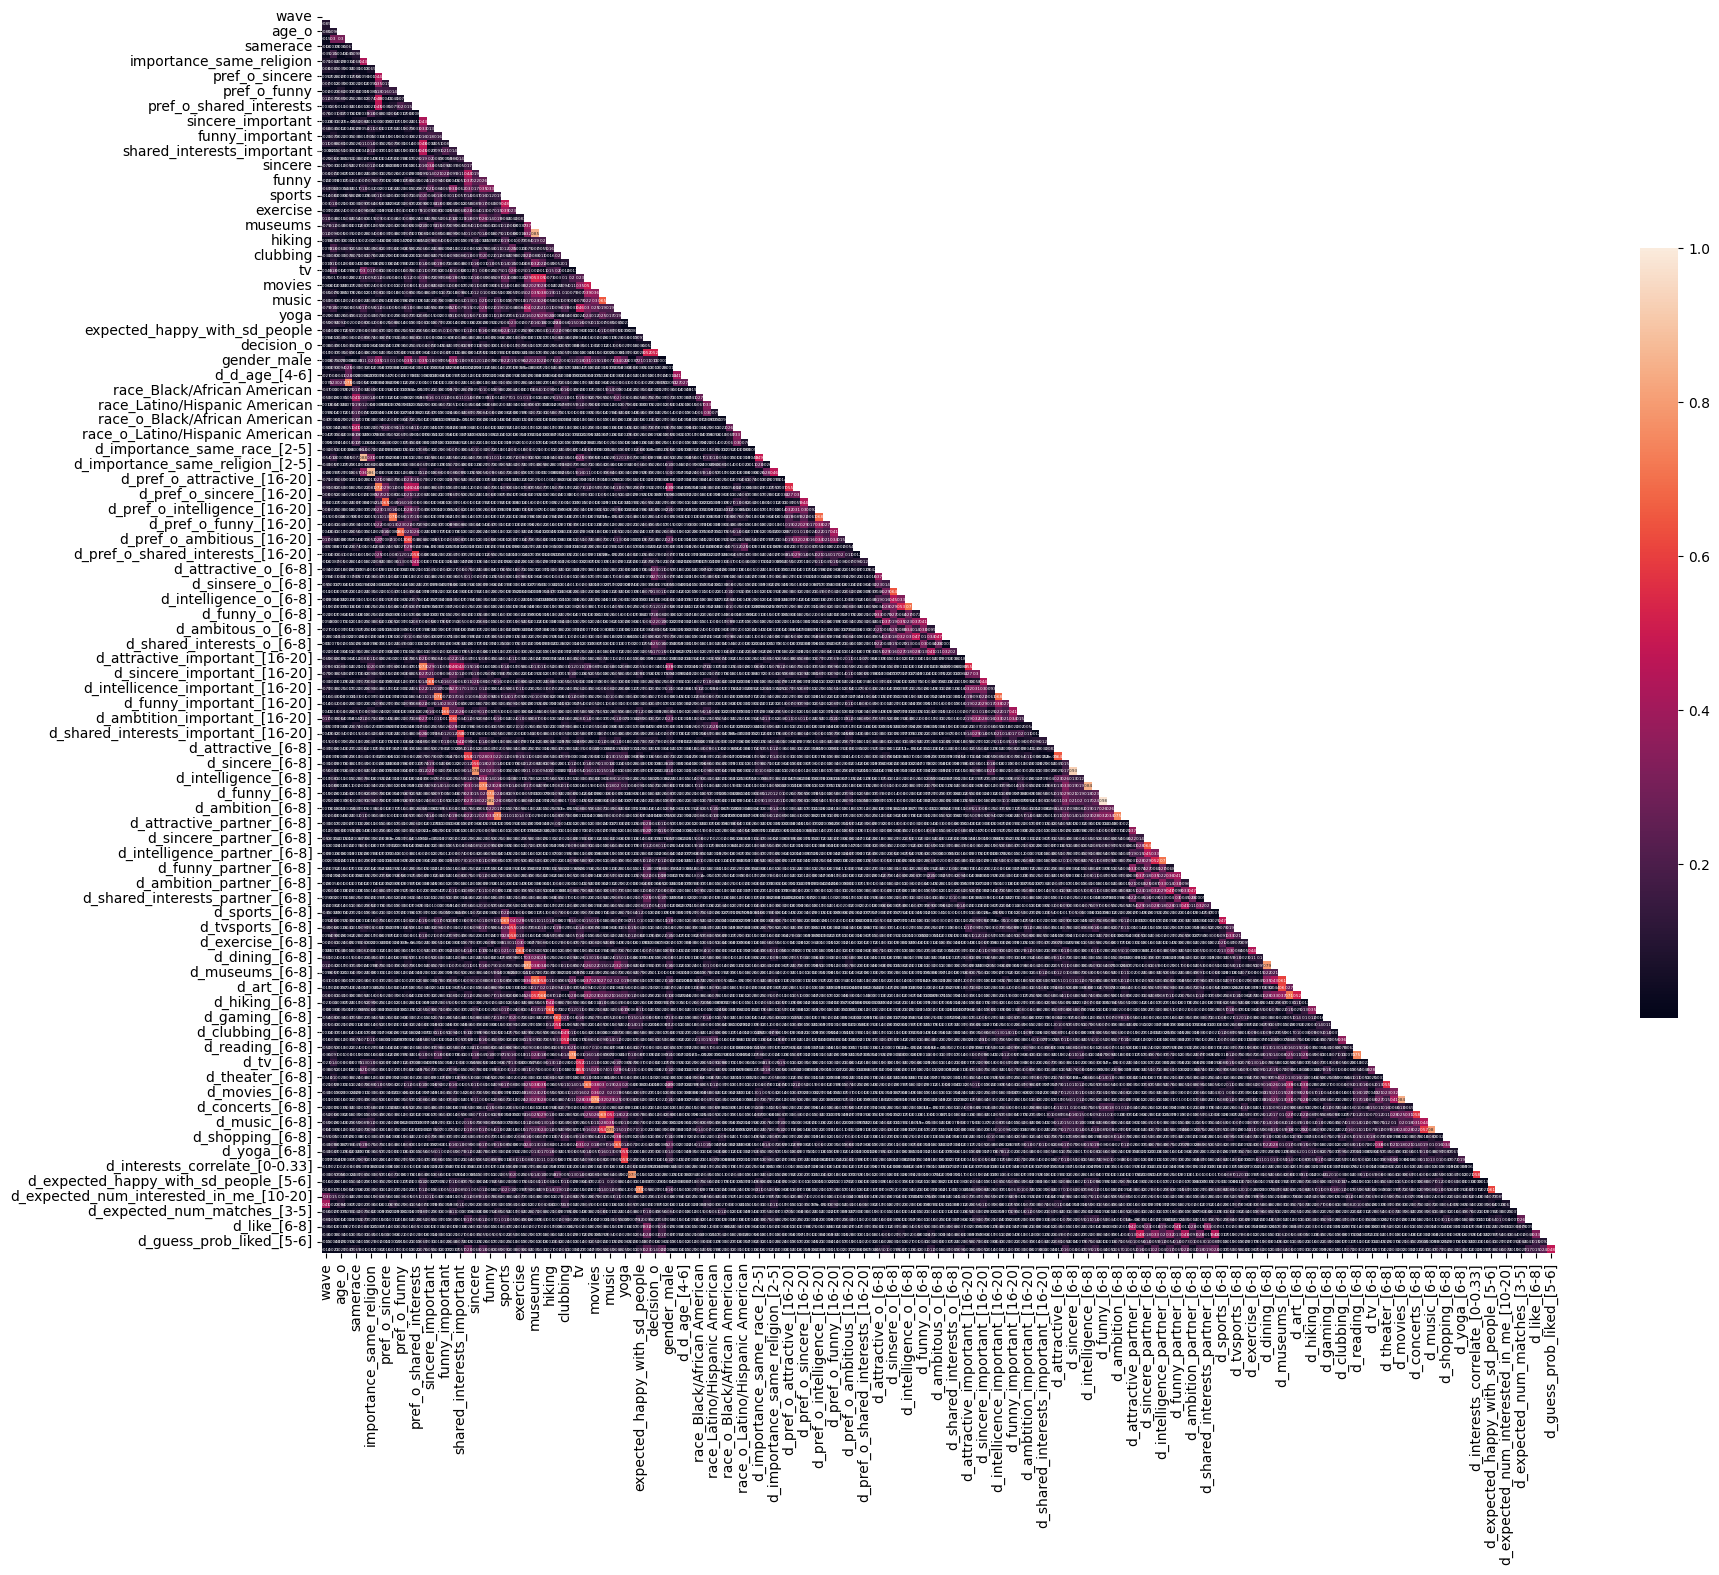

In [ ]:
corr=np.abs(df_oh.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
# Increased figure size to 20x20
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
# Reduced annotation font size for better readability
sns.heatmap(corr, mask=mask, vmax=1, square=True, linewidths=0,
            cbar_kws={"shrink": .5}, annot=corr, annot_kws={"size": 3}, # Reduced font size to 3
            )  # Removed dpi argument from here

# To save the figure with a specific DPI, use savefig:
plt.savefig("heatmap_big.png", dpi=600)  # Added dpi argument to savefig

plt.show()

# Discard strongly correlated columns (Threshold 0.5), discard those that are less correlated with the target

In [ ]:
import pandas as pd
import numpy as np

def find_correlated_columns(df, target_column='match', threshold=0.5):
    """
    Finds pairs of columns with correlation above a threshold and selects the one
    less correlated with the target column.

    Args:
        df: The input Pandas DataFrame.
        target_column: The name of the target column (default: 'match').
        threshold: The correlation threshold (default: 0.65).

    Returns:
        A list of column names to be dropped.
    """

    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find highly correlated pairs
    highly_correlated_pairs = [(col1, col2) for col1 in upper_triangle.columns
                               for col2 in upper_triangle.index
                               if upper_triangle.loc[col1, col2] > threshold and col1 != col2]

    # Select columns less correlated with the target
    columns_to_drop = []
    for col1, col2 in highly_correlated_pairs:
        corr_with_target_col1 = corr_matrix.loc[col1, target_column]
        corr_with_target_col2 = corr_matrix.loc[col2, target_column]

        if corr_with_target_col1 < corr_with_target_col2:
            columns_to_drop.append(col1)
        else:
            columns_to_drop.append(col2)

    # Remove duplicates
    columns_to_drop = list(set(columns_to_drop))

    return columns_to_drop

# Apply the function to your DataFrame
columns_to_drop = find_correlated_columns(df_oh)

print("Columns to drop:", columns_to_drop)

Columns to drop: ['d_attractive_[6-8]', 'd_funny_[9-10]', 'd_pref_o_attractive_[21-100]', 'attractive', 'museums', 'decision_o', 'music', 'decision', 'd_pref_o_shared_interests_[16-20]', 'd_importance_same_race_[6-10]', 'd_pref_o_attractive_[16-20]', 'd_yoga_[6-8]', 'd_interests_correlate_[0-0.33]', 'pref_o_ambitious', 'd_funny_important_[21-100]', 'd_d_age_[7-37]', 'tv', 'attractive_important', 'd_art_[9-10]', 'd_music_[9-10]', 'd_pref_o_funny_[21-100]', 'funny', 'd_importance_same_religion_[6-10]', 'movies', 'd_intelligence_partner_[6-8]', 'd_music_[6-8]', 'd_ambition_[9-10]', 'd_dining_[9-10]', 'd_hiking_[9-10]', 'theater', 'exercise', 'shopping', 'd_intelligence_o_[6-8]', 'ambtition_important', 'd_sincere_[6-8]', 'tvsports', 'd_gaming_[9-10]', 'd_intelligence_[9-10]', 'intellicence_important', 'd_theater_[9-10]', 'd_tv_[6-8]', 'd_intellicence_important_[16-20]', 'd_sincere_partner_[6-8]', 'd_intelligence_[6-8]', 'd_expected_happy_with_sd_people_[5-6]', 'd_museums_[9-10]', 'd_gaming

# Sort variables by their absolute correlation to the target variable, drop those below 0.05 correlation score

In [ ]:


# Calculate correlations with 'match'
correlations = df_oh.drop(columns=columns_to_drop).corr()['match'].abs().sort_values().drop('match')

# Remove 'match' from the correlations Series itself


for i in correlations[:69]:
  print(i)

0.0001196500125263296
0.0025104545412132453
0.003934284136119635
0.00474206230866503
0.005949336739143737
0.006083754267710886
0.006115891763453394
0.006968719849794943
0.007519019044913751
0.007529504883239833
0.008322363396654164
0.008464093706556673
0.00908890188668488
0.00910305500875931
0.011550086946063534
0.011864763927655128
0.012113539905420944
0.013356872193372516
0.013946252752051731
0.014304617744162198
0.015026672326122556
0.015137052511578743
0.016025747940531552
0.016545575989508902
0.016545575989508905
0.016574754908077645
0.01693986892798379
0.017072769673743184
0.017245925727389755
0.017259010463623003
0.017553767862472487
0.017884144485046553
0.019884188801663528
0.021322968649345787
0.021333891263549246
0.02172165241135556
0.02218153757375672
0.02241921803454633
0.022679139406239324
0.02297358345277092
0.02387232880735899
0.02394767989611635
0.024567766042313068
0.024567766042313196
0.025888094341314075
0.02634182893223223
0.026897698835519332
0.027157945700805312
0

In [ ]:

# Append names of correlations[:69] to columns_to_drop
columns_to_drop.extend(correlations[:69].index.tolist())

# Remove duplicates (if any)
columns_to_drop = list(set(columns_to_drop))

print("Columns to drop:", columns_to_drop)


Columns to drop: ['importance_same_religion', 'museums', 'gender_male', 'd_yoga_[6-8]', 'd_interests_correlate_[0-0.33]', 'sincere_important', 'd_importance_same_religion_[2-5]', 'reading', 'd_expected_num_interested_in_me_[4-9]', 'art', 'movies', 'd_attractive_[9-10]', 'd_ambition_[9-10]', 'd_dining_[9-10]', 'd_d_age_[4-6]', 'd_pref_o_ambitious_[21-100]', 'shopping', 'ambtition_important', 'interests_correlate', 'tvsports', 'd_gaming_[9-10]', 'ambition', 'd_shared_interests_important_[21-100]', 'race_European/Caucasian-American', 'intellicence_important', 'd_theater_[9-10]', 'race_o_European/Caucasian-American', 'gaming', 'd_tvsports_[6-8]', 'd_ambtition_important_[16-20]', 'd_sincere_important_[16-20]', 'd_ambtition_important_[21-100]', 'd_shopping_[9-10]', 'd_pref_o_intelligence_[21-100]', 'd_gaming_[6-8]', 'd_hiking_[6-8]', 'd_sports_[9-10]', 'd_yoga_[9-10]', 'd_museums_[6-8]', 'race_o_Latino/Hispanic American', 'concerts', 'd_sinsere_o_[9-10]', 'wave', 'd_interests_correlate_[0.33

# Create reduced training and testing sets

In [ ]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(df_oh.drop(columns="match").drop(columns=columns_to_drop), target, test_size=0.20, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()
normalizer.fit(X_train_reduced)
X_train_norm_red = normalizer.transform(X_train_reduced)

X_test_norm_red = normalizer.transform(X_test_reduced)

# Fit the KNNClassifier to the reduced and normalized training Data

In [ ]:
# prompt: move the "match" column to the end of the table

# Move the 'match' column to the end of the DataFrame
cols = list(df_oh.columns)
cols.remove('match')
cols.append('match')
df_oh_match_last = df_oh[cols]


In [ ]:

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_norm_red, y_train_reduced)
knn.score(X_test_norm_red, y_test_reduced)


# Make predictions on the test set
y_pred = knn.predict(X_test_norm_red)

# Calculate evaluation metrics
accuracyknnr = accuracy_score(y_test_reduced, y_pred)
precisionknnr = precision_score(y_test_reduced, y_pred)
recallknnr = recall_score(y_test_reduced, y_pred)
f1knnr = f1_score(y_test_reduced, y_pred)

# Print the results
print(f"Accuracy: {accuracyknnr}")
print(f"Precision: {precisionknnr}")
print(f"Recall: {recallknnr}")
print(f"F1 Score: {f1knnr}")

Accuracy: 0.8294044665012407
Precision: 0.5094339622641509
Recall: 0.09782608695652174
F1 Score: 0.1641337386018237


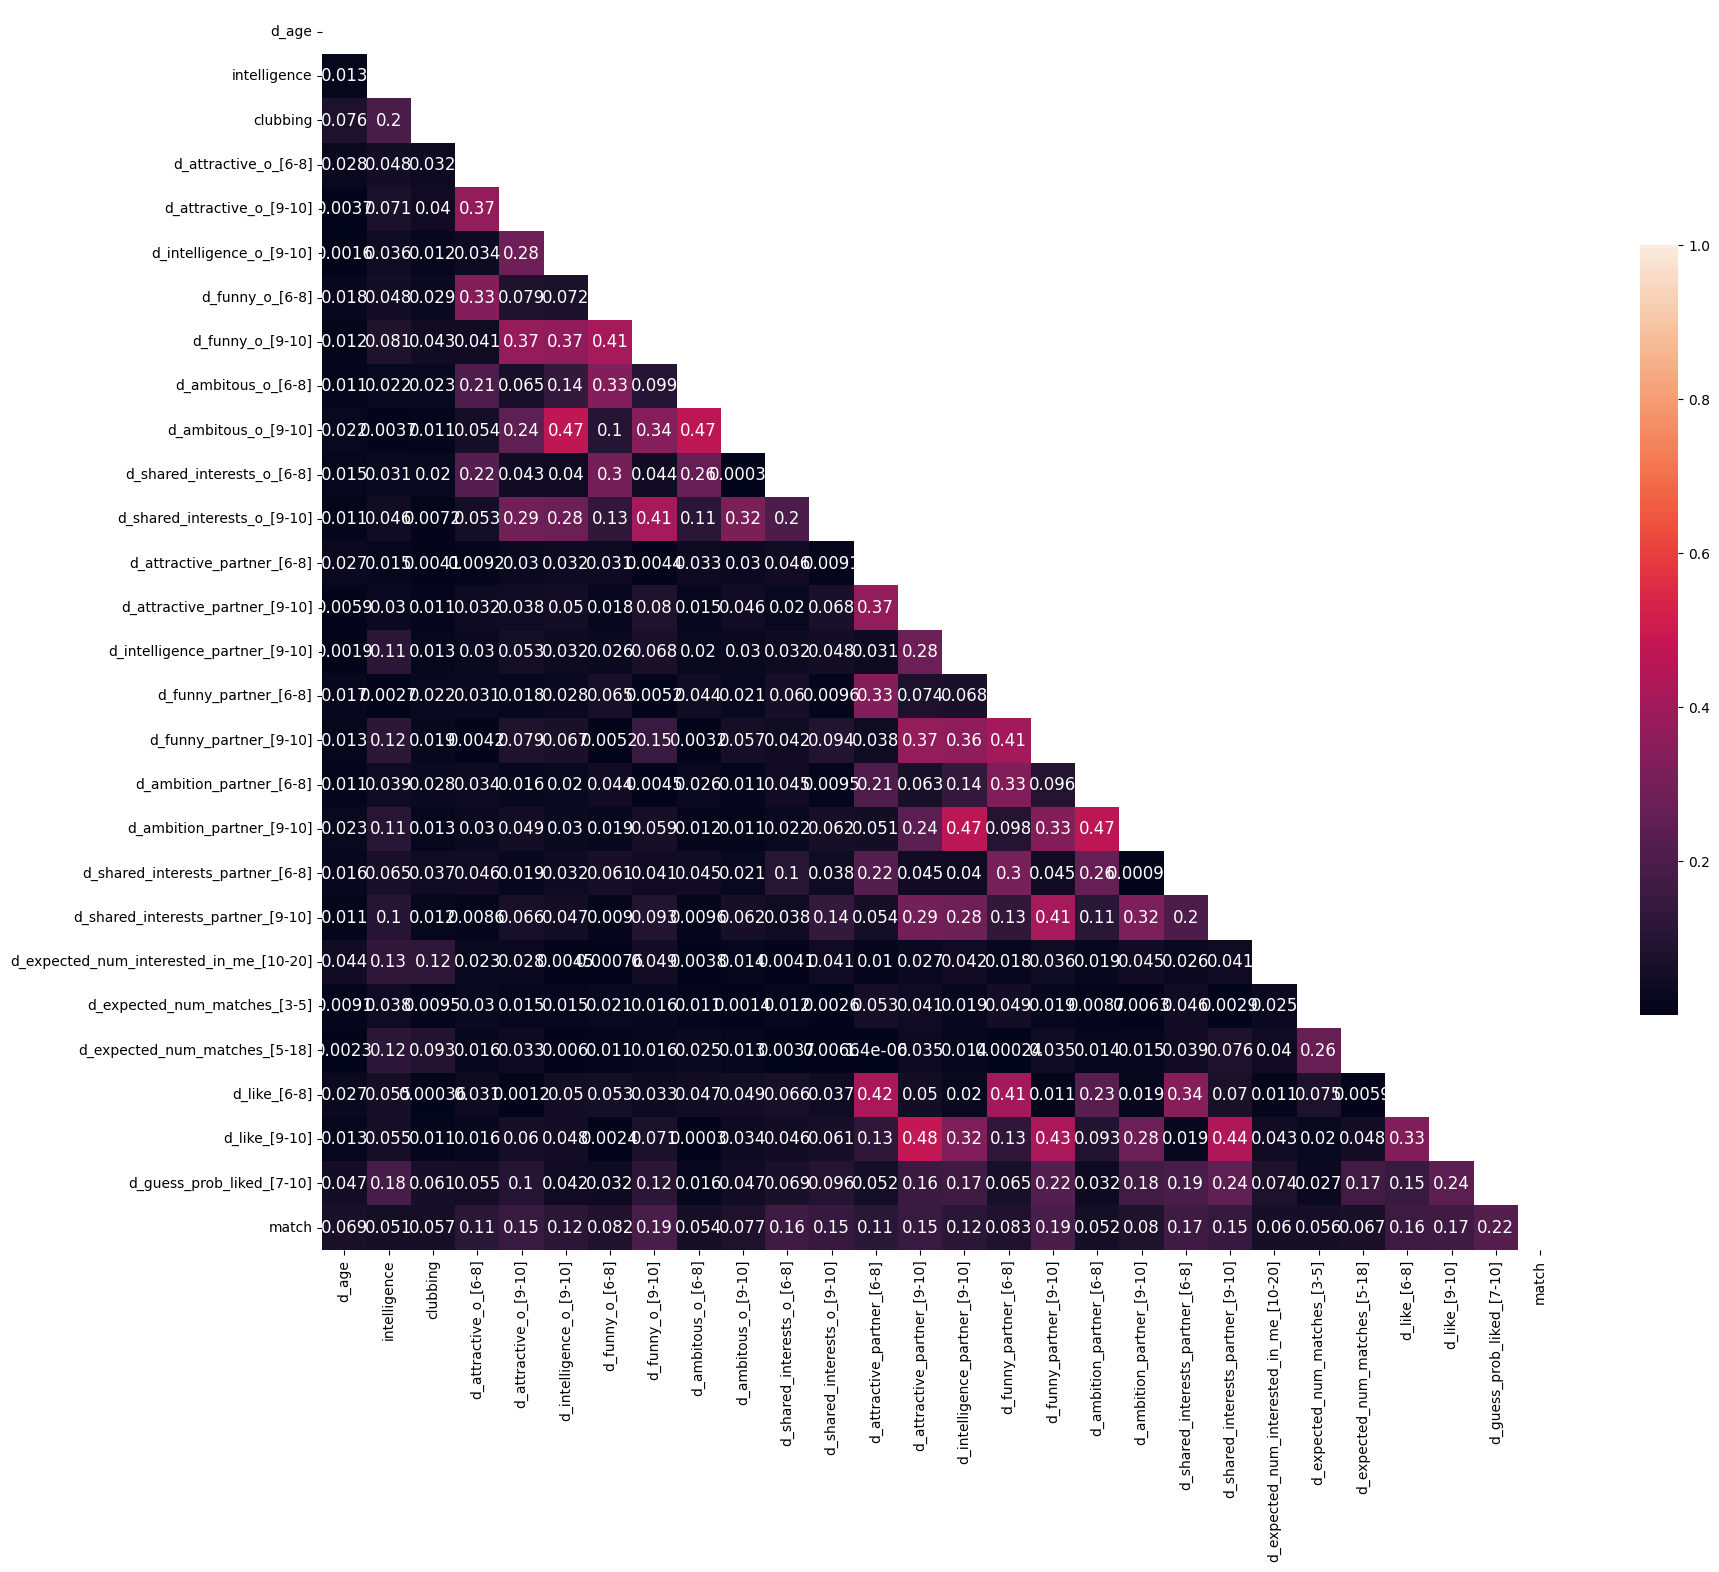

In [ ]:
corr=np.abs(df_oh_match_last.drop(columns=columns_to_drop).corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
# Increased figure size to 20x20
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
# Reduced annotation font size for better readability
sns.heatmap(corr, mask=mask, vmax=1, square=True, linewidths=0,
            cbar_kws={"shrink": .5}, annot=corr, annot_kws={"size": 12}, # Reduced font size to 3
            )  # Removed dpi argument from here

# To save the figure with a specific DPI, use savefig:
plt.savefig("heatmap.png", dpi=600)  # Added dpi argument to savefig

plt.show()

In [ ]:
#Got it down to 28 columns. only columns that correlate at least more than 5% with the target and do not correlate with another column more than 50%

# Create Logisitcal regression on reduced data


In [ ]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(df_oh.drop(columns="match").drop(columns=columns_to_drop), target, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_reduced, y_train_reduced)
pred = log_reg.predict_proba(X_test_reduced)
pred

array([[0.86606072, 0.13393928],
       [0.93672065, 0.06327935],
       [0.62905269, 0.37094731],
       ...,
       [0.78181176, 0.21818824],
       [0.72271598, 0.27728402],
       [0.82211543, 0.17788457]], shape=(1612, 2))

In [ ]:
pred = log_reg.predict(X_test_reduced)  # Use predict for class labels

# Calculate Evaluation Metrics
accuracylr = accuracy_score(y_test_reduced, pred)
precisionlr = precision_score(y_test_reduced, pred)
recalllr = recall_score(y_test_reduced, pred)
f1lr = f1_score(y_test_reduced, pred)

# Print the Results
print(f"Accuracy: {accuracylr}")
print(f"Precision: {precisionlr}")
print(f"Recall: {recalllr}")
print(f"F1 Score: {f1lr}")

Accuracy: 0.8449131513647643
Precision: 0.625
Recall: 0.23550724637681159
F1 Score: 0.34210526315789475


# Create Decision Tree Classifier on reduced data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_classifier.fit(X_train_reduced, y_train_reduced)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:

pred = tree_classifier.predict(X_test_reduced)

# Assuming 'y_test' contains the true labels and 'pred' contains the predicted labels
# For Logistic Regression: pred = log_reg.predict(X_test)
# For Decision Tree: pred = tree_classifier.predict(X_test)

accuracydt = accuracy_score(y_test_reduced, pred)
precisiondt = precision_score(y_test_reduced, pred)
recalldt = recall_score(y_test_reduced, pred)
f1dt = f1_score(y_test_reduced, pred)

print(f"Accuracy: {accuracydt}")
print(f"Precision: {precisiondt}")
print(f"Recall: {recalldt}")
print(f"F1 Score: {f1dt}")

Accuracy: 0.8380893300248139
Precision: 0.7142857142857143
Recall: 0.09057971014492754
F1 Score: 0.1607717041800643


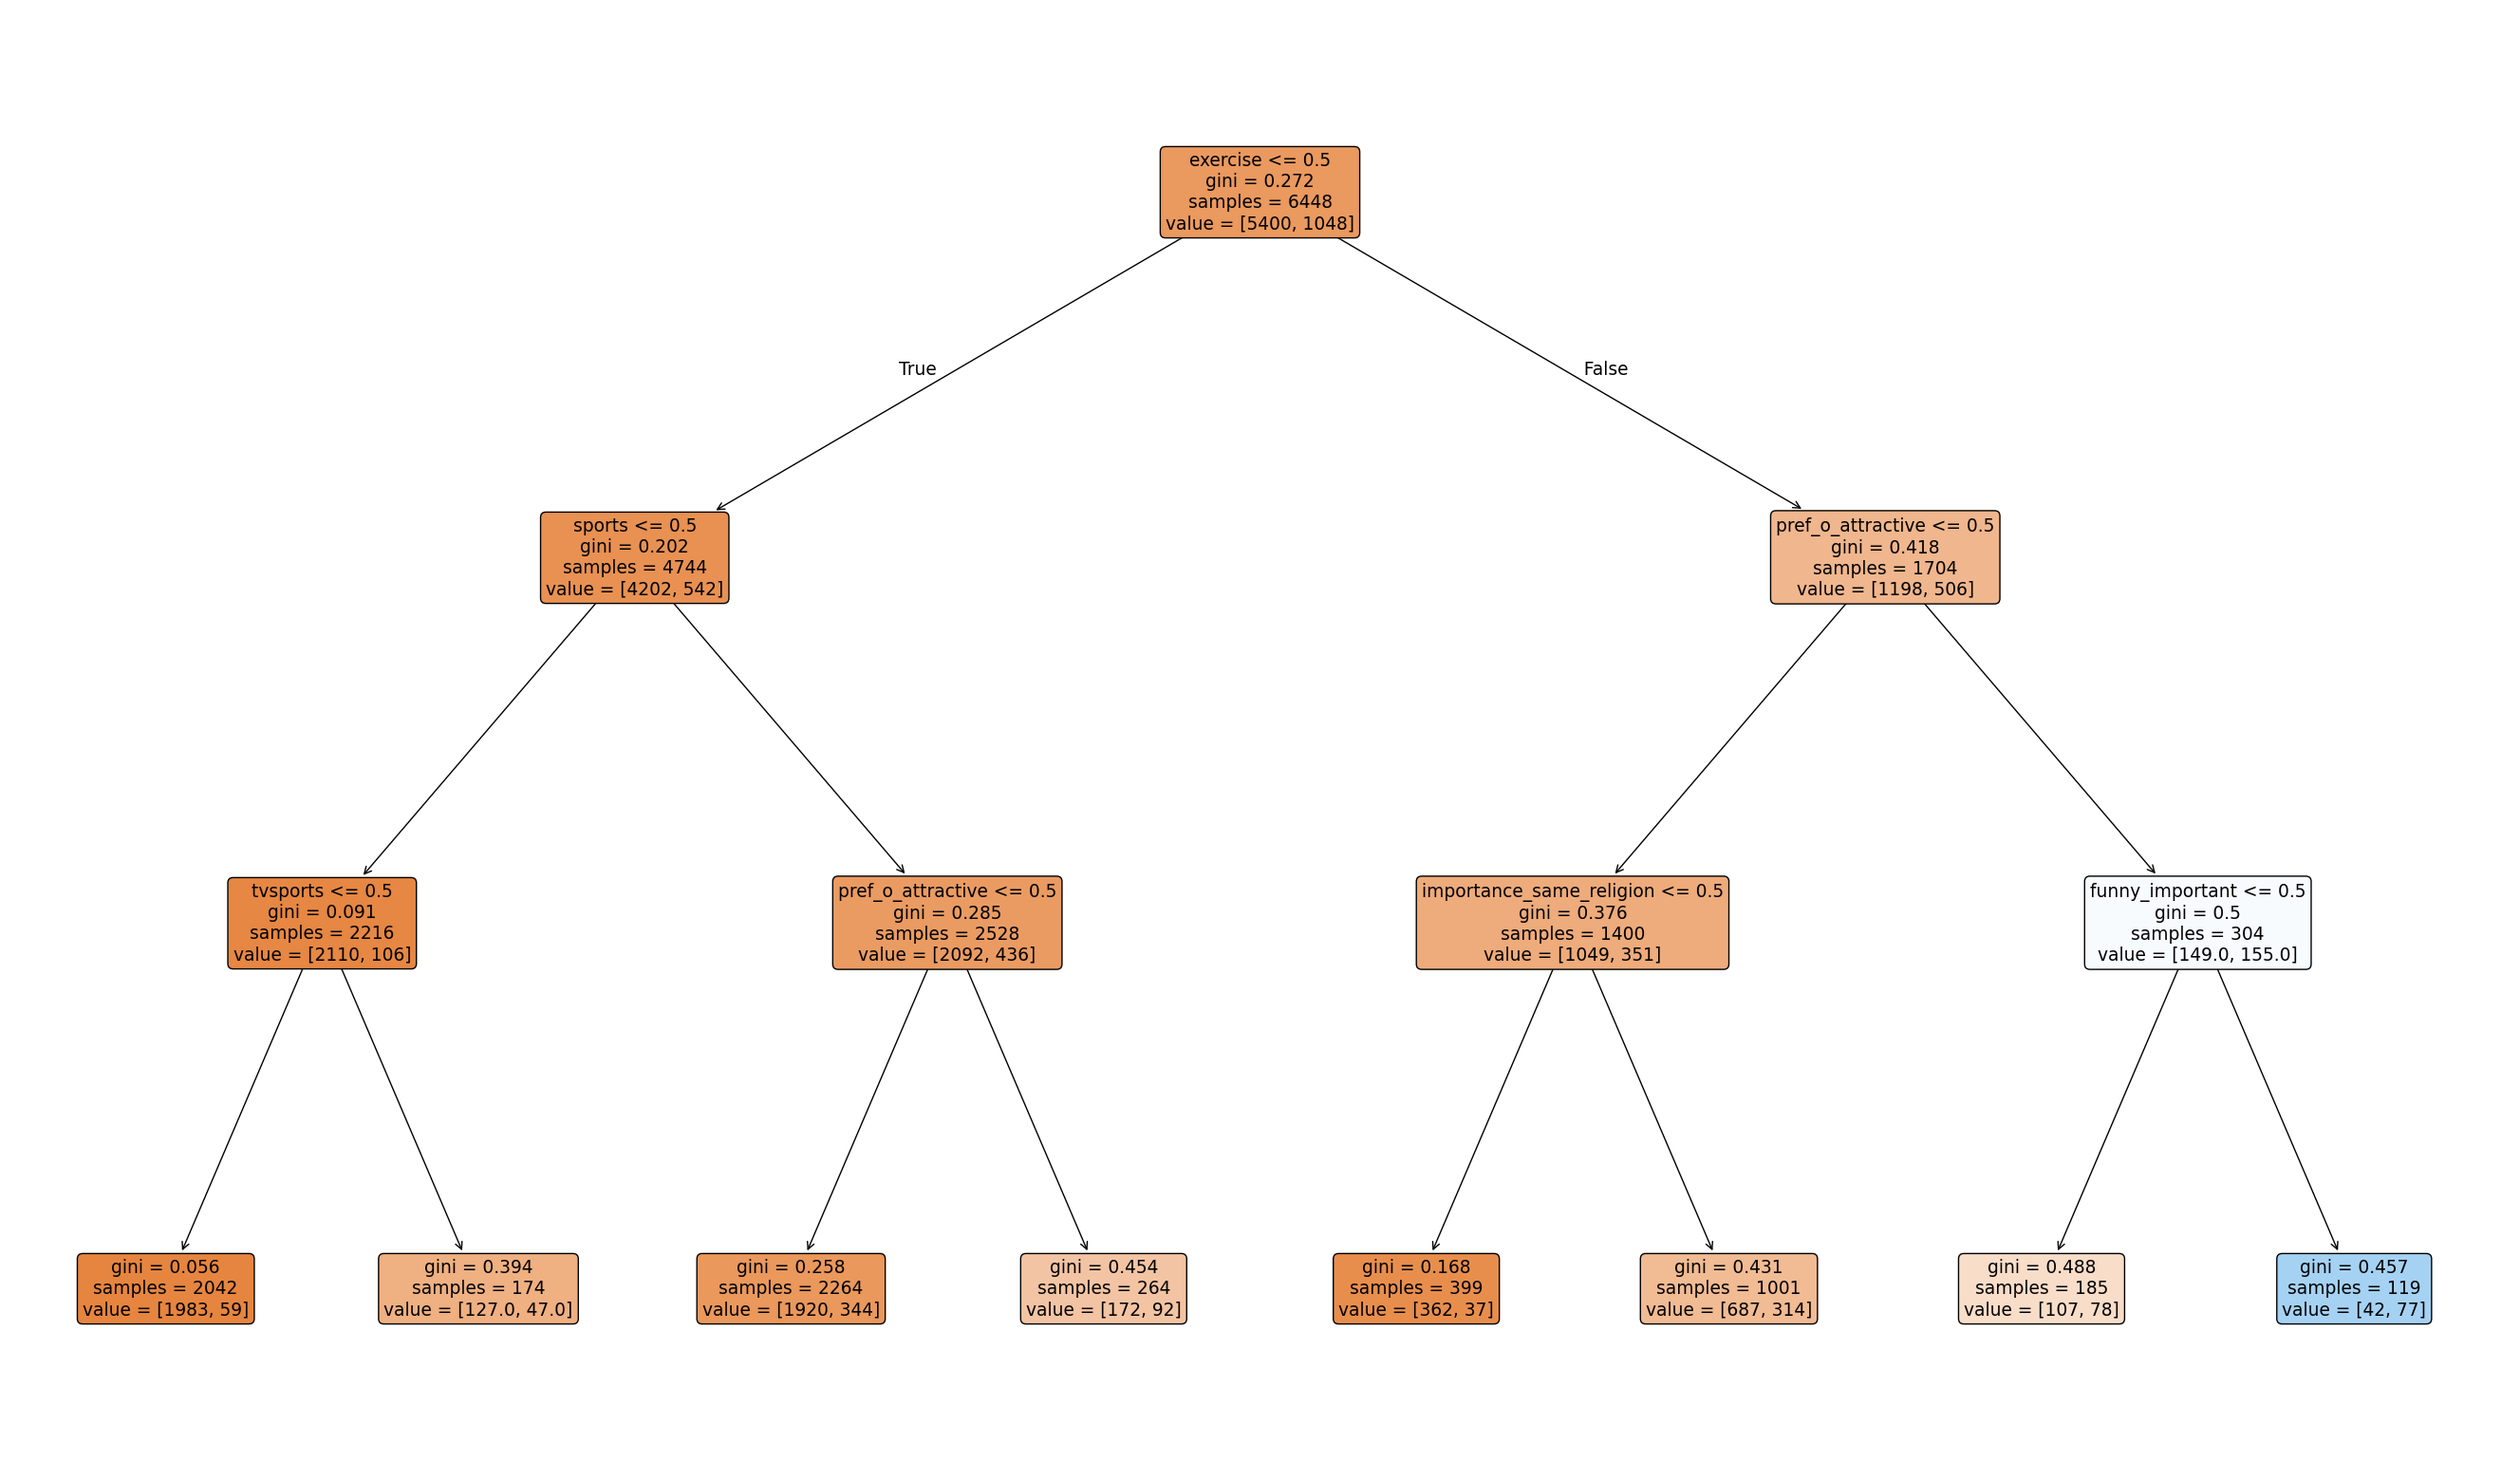

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(tree_classifier,filled = True, rounded=True,feature_names=list(X_train.columns))
plt.show()

# Ensemble Methods

Bagging


In [ ]:

from sklearn.ensemble import BaggingClassifier

# Assuming X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced are defined
# from the previous code.

# Initialize the Bagging Classifier, use estimator instead of base_estimator for older versions of scikit-learn
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the classifier
bagging_classifier.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test_reduced)

# Evaluate the model
accuracybc = accuracy_score(y_test_reduced, y_pred)
precisionbc = precision_score(y_test_reduced, y_pred)
recallbc = recall_score(y_test_reduced, y_pred)
f1bc = f1_score(y_test_reduced, y_pred)

print(f"Accuracy: {accuracybc}")
print(f"Precision: {precisionbc}")
print(f"Recall: {recallbc}")
print(f"F1 Score: {f1bc}")

Accuracy: 0.8225806451612904
Precision: 0.4666666666666667
Recall: 0.2536231884057971
F1 Score: 0.3286384976525822


In [ ]:
# prompt: implement pasting classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced are defined
# from the previous code.

# Initialize the pasting classifier (BaggingClassifier with bootstrap=False)
pasting_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42, bootstrap=False)

# Train the classifier
pasting_classifier.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred = pasting_classifier.predict(X_test_reduced)

# Evaluate the model
accuracy_pasting = accuracy_score(y_test_reduced, y_pred)
precision_pasting = precision_score(y_test_reduced, y_pred)
recall_pasting = recall_score(y_test_reduced, y_pred)
f1_pasting = f1_score(y_test_reduced, y_pred)

print(f"Pasting Classifier:")
print(f"Accuracy: {accuracy_pasting}")
print(f"Precision: {precision_pasting}")
print(f"Recall: {recall_pasting}")
print(f"F1 Score: {f1_pasting}")


Pasting Classifier:
Accuracy: 0.7704714640198511
Precision: 0.32971014492753625
Recall: 0.32971014492753625
F1 Score: 0.32971014492753625


# Random Forest


In [ ]:
# prompt: implement random forest classifier

from sklearn.ensemble import RandomForestClassifier

# Assuming X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced are defined
# from the previous code.

# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the classifier
random_forest_classifier.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test_reduced)

# Evaluate the model
accuracyrf = accuracy_score(y_test_reduced, y_pred)
precisionrf = precision_score(y_test_reduced, y_pred)
recallrf = recall_score(y_test_reduced, y_pred)
f1rf = f1_score(y_test_reduced, y_pred)

print(f"Accuracy: {accuracyrf}")
print(f"Precision: {precisionrf}")
print(f"Recall: {recallrf}")
print(f"F1 Score: {f1rf}")


Accuracy: 0.8374689826302729
Precision: 0.5660377358490566
Recall: 0.21739130434782608
F1 Score: 0.31413612565445026


# ADA Boost Classifier

In [ ]:
# prompt: implement ada boost classifier

from sklearn.ensemble import AdaBoostClassifier

# Assuming X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced are defined
# from the previous code.

# Initialize the AdaBoost Classifier
ada_boost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the classifier
ada_boost_classifier.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred = ada_boost_classifier.predict(X_test_reduced)

# Evaluate the model
accuracyab = accuracy_score(y_test_reduced, y_pred)
precisionab = precision_score(y_test_reduced, y_pred)
recallab = recall_score(y_test_reduced, y_pred)
f1ab = f1_score(y_test_reduced, y_pred)

print(f"Accuracy: {accuracyab}")
print(f"Precision: {precisionab}")
print(f"Recall: {recallab}")
print(f"F1 Score: {f1ab}")


Accuracy: 0.8405707196029777
Precision: 0.6043956043956044
Recall: 0.19927536231884058
F1 Score: 0.2997275204359673


# Gradient Boost Classifier

In [ ]:
# prompt: implement gradient boost classifier

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(min_samples_leaf=5, n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Train the classifier
gb_classifier.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test_reduced)

# Evaluate the model
accuracygb = accuracy_score(y_test_reduced, y_pred)
precisiongb = precision_score(y_test_reduced, y_pred)
recallgb = recall_score(y_test_reduced, y_pred)
f1gb = f1_score(y_test_reduced, y_pred)

print(f"Accuracy: {accuracygb}")
print(f"Precision: {precisiongb}")
print(f"Recall: {recallgb}")
print(f"F1 Score: {f1gb}")


Accuracy: 0.8504962779156328
Precision: 0.6923076923076923
Recall: 0.22826086956521738
F1 Score: 0.34332425068119893


# Summary Stats


In [ ]:
# prompt: collect all the different model scores nito one dataframe and display

# Create a dictionary to store the model scores
model_scores = {
    'Model': ['KNN', 'KNN Reduced', 'Logistic Regression', 'Decision Tree', 'Bagging Classifier', 'Pasting Classifier', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [accuracyknn, accuracyknnr, accuracylr, accuracydt, accuracybc, accuracy_pasting, accuracyrf, accuracyab, accuracygb],
    'Precision': [precisionknn, precisionknnr, precisionlr, precisiondt, precisionbc, precision_pasting, precisionrf, precisionab, precisiongb],
    'Recall': [recallknn, recallknnr, recalllr, recalldt, recallbc, recall_pasting, recallrf, recallab, recallgb],
    'F1 Score': [f1knn, f1knnr, f1lr, f1dt, f1bc, f1_pasting, f1rf, f1ab, f1gb]
}

# Create a Pandas DataFrame from the dictionary
model_scores_df = pd.DataFrame(model_scores)

# Display the DataFrame
model_scores_df


,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.829404,0.513514,0.068841,0.121406
1,KNN Reduced,0.829404,0.509434,0.097826,0.164134
2,Logistic Regression,0.844913,0.625000,0.235507,0.342105
3,Decision Tree,0.838089,0.714286,0.090580,0.160772
4,Bagging Classifier,0.822581,0.466667,0.253623,0.328638
5,Pasting Classifier,0.770471,0.329710,0.329710,0.329710
6,Random Forest,0.837469,0.566038,0.217391,0.314136
7,AdaBoost,0.840571,0.604396,0.199275,0.299728
8,Gradient Boosting,0.850496,0.692308,0.228261,0.343324


# nice chart

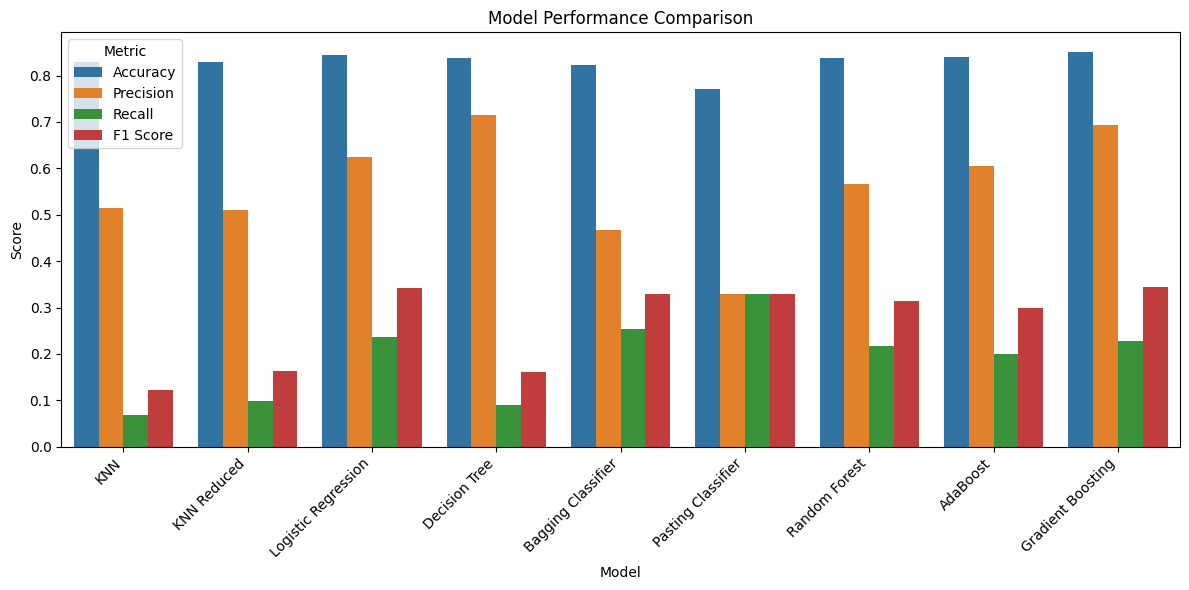

In [ ]:
# prompt: make another chart I didnt like that one

import matplotlib.pyplot as plt

# Assuming model_scores_df is your DataFrame
model_scores_df = pd.DataFrame({
    'Model': ['KNN', 'KNN Reduced', 'Logistic Regression', 'Decision Tree', 'Bagging Classifier', 'Pasting Classifier', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [accuracyknn, accuracyknnr, accuracylr, accuracydt, accuracybc, accuracy_pasting, accuracyrf, accuracyab, accuracygb],
    'Precision': [precisionknn, precisionknnr, precisionlr, precisiondt, precisionbc, precision_pasting, precisionrf, precisionab, precisiongb],
    'Recall': [recallknn, recallknnr, recalllr, recalldt, recallbc, recall_pasting, recallrf, recallab, recallgb],
    'F1 Score': [f1knn, f1knnr, f1lr, f1dt, f1bc, f1_pasting, f1rf, f1ab, f1gb]
})


# Melt the DataFrame for easier plotting
melted_df = pd.melt(model_scores_df, id_vars='Model', var_name='Metric', value_name='Score')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Hyperparameter Tuning


Let's see how we fine tune our model, in order to that, we will optimize the following hyperparameters:

- **n_estimators:** number of estimators, in this case, number of trees

- **max_leaf_nodes:** maxium number of total leafs to consider

- **max_depth:** maxium number of levels in each tree

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid = {"n_estimators": [50, 100, 200,500],
        "max_leaf_nodes": [250, 500, 1000, None],
        "max_depth":[10,30,50]}



In [ ]:
model = GridSearchCV(estimator = gb_classifier, param_grid = grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
model.fit(X_train_reduced, y_train_reduced)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(min_samples_leaf=5,
                                                  random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50],
                         'max_leaf_nodes': [250, 500, 1000, None],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=2)

In [ ]:
model.best_params_

{'max_depth': 10, 'max_leaf_nodes': 500, 'n_estimators': 50}

In [ ]:
best_model = model.best_estimator_

In [ ]:
pred = best_model.predict(X_test_reduced)

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_reduced)

# Evaluate the model
accuracygbGS = accuracy_score(y_test_reduced, y_pred)
precisiongbGS = precision_score(y_test_reduced, y_pred)
recallgbGS = recall_score(y_test_reduced, y_pred)
f1gbGS = f1_score(y_test_reduced, y_pred)

print(f"Accuracy: {accuracygbGS}")
print(f"Precision: {precisiongbGS}")
print(f"Recall: {recallgbGS}")
print(f"F1 Score: {f1gbGS}")

Accuracy: 0.836848635235732
Precision: 0.543046357615894
Recall: 0.2971014492753623
F1 Score: 0.3840749414519906


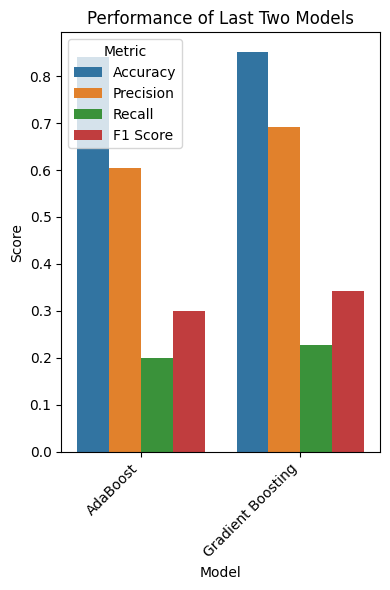

In [ ]:

# Assuming model_scores_df is your DataFrame
# ... (your existing code to create model_scores_df)

# Select the last two models
last_two_models = model_scores_df.tail(2)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(last_two_models, id_vars='Model', var_name='Metric', value_name='Score')

# Create the plot with adjusted figure size
plt.figure(figsize=(4, 6))  # Adjust width as needed
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance of Last Two Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
